<a href="https://colab.research.google.com/github/BlackPuma075/Advanced_Lab_2025/blob/main/Final%20Project/Spectra_production_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this notebook I tested the production of the spectra for the NN**

In [ ]:
import numpy as np
!apt-get install -y gfortran
!git clone https://github.com/lesgourg/class_public.git
%cd class_public
!make

%cd python
!python3 setup.py install

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gfortran is already the newest version (4:11.2.0-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Cloning into 'class_public'...
remote: Enumerating objects: 31195, done.
remote: Total 31195 (delta 0), reused 0 (delta 0), pack-reused 31195 (from 2)
Receiving objects: 100% (31195/31195), 772.26 MiB | 20.89 MiB/s, done.
Resolving deltas: 100% (21623/21623), done.
/content/class_public
if ! [ -e /content/class_public/build ]; then mkdir /content/class_public/build ; mkdir /content/class_public/build/lib; fi;
touch build/.base
cd /content/class_public/build;gcc -O3 -pthread  -g -fPIC -D__CLASSDIR__='"/content/class_public"' -DHYREC -I../include -I../external/RecfastCLASS -I../external/heating -I../external/HyRec2020 -I../external/Halofit -I../external/HMcode -c ../tools/growTable.c -o growTable.o
cd /content/class_public/build;gcc -O3 -pthread  -g -fPIC -D__CLASSDIR__=

In [ ]:
from classy import Class

cosmo = Class()
cosmo.set({
    'h': 0.67,
    'omega_b': 0.022,
    'omega_cdm': 0.12,
    'A_s': 2.1e-9,
    'n_s': 0.96,
    'tau_reio': 0.06,
    'output': 'mPk',
    'P_k_max_1/Mpc': 10.0
})
cosmo.compute()

# Obtener espectro de potencia a z = 0
k_vals = [0.01, 0.1, 0.5]
for k in k_vals:
    print(f"P(k={k}) = {cosmo.pk(k, 0.0)}")

ks = np.logspace(-3, 1, 100)  # de 0.001 a 10 h/Mpc
Pk = [cosmo.pk(k, 0.0) for k in ks]

cosmo.struct_cleanup()
cosmo.empty()


P(k=0.01) = 81965.42474078349
P(k=0.1) = 10810.547181012911
P(k=0.5) = 447.1477181056167


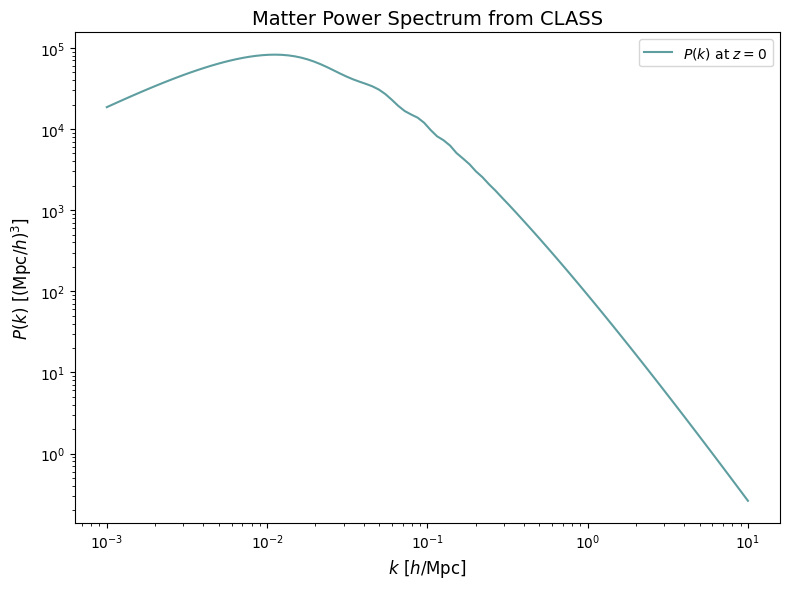

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.loglog(ks, Pk, label=r'$P(k)$ at $z=0$', color='cadetblue')
plt.xlabel(r'$k\ [h/\mathrm{Mpc}]$', fontsize=12)
plt.ylabel(r'$P(k)\ [(\mathrm{Mpc}/h)^3]$', fontsize=12)
plt.title('Matter Power Spectrum from CLASS', fontsize=14)
#plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.tight_layout()
plt.show()

**Code snippet to create a catalog of 100 spectra**

**Matter Power Spectrum Catalog**

-Class computation of the spectra

-Variation on $\Omega_m$ only

-100 spectra catalog

In [ ]:
%%time
import numpy as np
from classy import Class
import matplotlib.pyplot as plt

# Valores fijos
h = 0.67
omega_b = 0.022
A_s = 2.1e-9
n_s = 0.96
tau = 0.06
z = 0.0
ks = np.logspace(-3, 1, 100)  #100 puntos entre 0.001 y 10 h/Mpc

#Rango de valores de Omega_m
Omega_m_vals = np.linspace(0.2, 0.4, 100)  # 100 valores entre 0.2 y 0.4

#Lista para almacenar los espectros
spectra = []

for Omega_m in Omega_m_vals:
    #Calcular omega_cdm necesario para ese Omega_m
    omega_cdm = Omega_m * h**2 - omega_b

    #Cosmología
    cosmo = Class()
    cosmo.set({
        'h': h,
        'omega_b': omega_b,
        'omega_cdm': omega_cdm,
        'A_s': A_s,
        'n_s': n_s,
        'tau_reio': tau,
        'output': 'mPk',
        'P_k_max_1/Mpc': 10.0
    })

    #Calcular espectro
    cosmo.compute()
    Pk = [cosmo.pk(k, z) for k in ks]
    spectra.append(Pk)

    cosmo.struct_cleanup()
    cosmo.empty()

#'spectra' es una lista de 100 espectros con 100 valores de k cada uno


CPU times: user 2min 56s, sys: 2.32 s, total: 2min 58s
Wall time: 1min 48s


**Matter Power Spectrum Catalog**

-Class computation of the spectra

-Variation on $\Omega_m$ and $n_s$

-100 spectra catalog

In [ ]:
%%time
import numpy as np
from classy import Class
import matplotlib.pyplot as plt

# Valores fijos
h = 0.67
omega_b = 0.022
A_s = 2.1e-9
#n_s = 0.96
tau = 0.06
z = 0.0
ks = np.logspace(-3, 1, 100)  #100 puntos entre 0.001 y 10 h/Mpc

#Rango de valores de Omega_m
Omega_m_vals = np.linspace(0.2, 0.4, 100)  # 100 valores entre 0.2 y 0.4
ns_vals = np.linspace(0.95, 0.97,100)

#Lista para almacenar los espectros
spectra = []

for Omega_m in Omega_m_vals:
    #Calcular omega_cdm necesario para ese Omega_m
    omega_cdm = Omega_m * h**2 - omega_b

    for n_s in ns_vals:

      #Cosmología
      cosmo = Class()
      cosmo.set({
          'h': h,
          'omega_b': omega_b,
          'omega_cdm': omega_cdm,
          'A_s': A_s,
          'n_s': n_s,
          'tau_reio': tau,
          'output': 'mPk',
          'P_k_max_1/Mpc': 10.0
      })

    #Calcular espectro
    cosmo.compute()
    Pk = [cosmo.pk(k, z) for k in ks]
    spectra.append(Pk)

    cosmo.struct_cleanup()
    cosmo.empty()

#'spectra' es una lista de 100 espectros con 100 valores de k cada uno

CPU times: user 2min 56s, sys: 2.19 s, total: 2min 58s
Wall time: 1min 49s


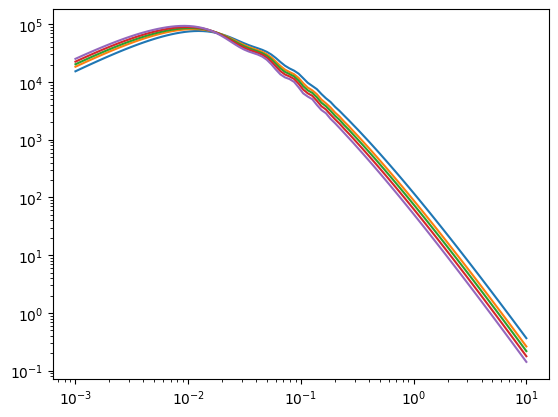

In [ ]:
plt.loglog(ks, spectra[75])
plt.loglog(ks, spectra[55])
plt.loglog(ks, spectra[45])
plt.loglog(ks, spectra[35])
plt.loglog(ks, spectra[25])